In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Задача XIV.10.2

### Сетка и параметры

In [2]:
L = 20
T = 18
h = 0.5
CFL = [0.6,1,1.01]

In [3]:
def calculate_tau(CFL):
    return CFL*h

In [4]:
def grid(T,L,h,tau):
    x = np.arange(0,L+h/2,h)
    t = np.arange(0,T+tau/2,tau)
    return x,t

### Схема уголка

In [5]:
tau = calculate_tau(CFL[0])
x,t = grid(T,L,h,tau)

In [6]:
def corner_scheme(x,t,L):
    y = np.zeros([len(x),len(t)]); y0 = []
    for i in x:
        y0.append(math.sin(4*math.pi*i/L))
    for i in range(0,len(x)):
            y[i][0] = y0[i]
    for j in range(len(t)-1):
        for i in range(1,len(x)):
            y[i][j+1] = y[i][j]-tau/h*(y[i][j]-y[i-1][j])
        y[0][j+1]=y[len(x)-1][j+1]
    return y

In [7]:
def print_graphs(y,t,x,CFL):
    if CFL == 0.6:
        T = [0,5.1,10.2,15,18]
    elif CFL == 1:
        T = [0,5,10,15,18]
    elif CFL == 1.01:
        T = [0,5.05,10.1,15.15,18.18]
    indexes = [list(t).index(i) for i in T]
    fig, ax = plt.subplots(5); j = 0
    for time in indexes:
        yn = []
        for i in range(len(x)):
            yn.append(y[i][time])
        ax[j].plot(x,yn, color = "mediumvioletred")
        ax[j].set_xlabel('x')
        ax[j].set_ylabel('y')
        ax[j].grid()
        title = "t = " + str(t[time])
        ax[j].set_title(title)
        j += 1
        fig.set_figheight(15)
        fig.set_figwidth(10)
        ax[0].set_title("CFL = " + str(CFL) + "\n" + "t = " + str(T[0]))
    plt.subplots_adjust(hspace=0.4)

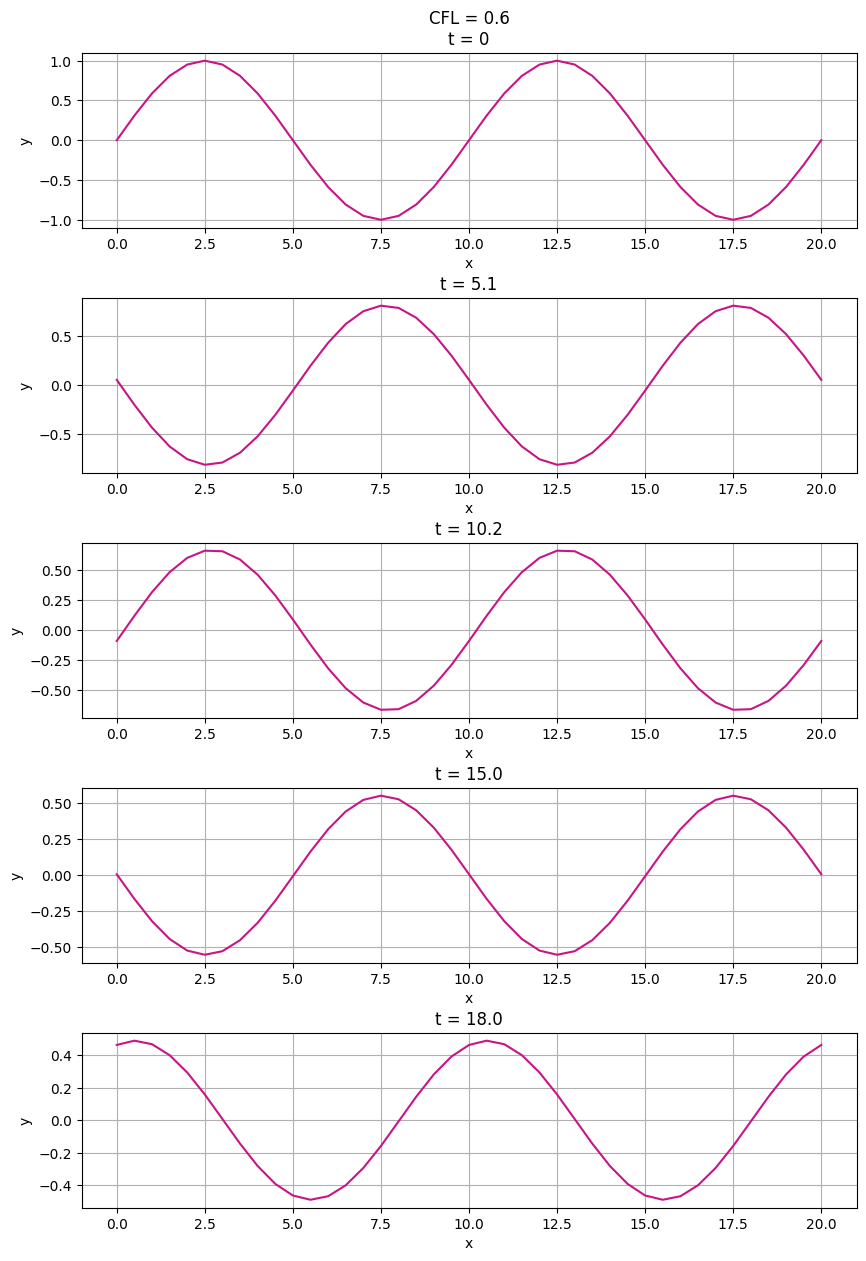

In [8]:
tau = calculate_tau(CFL[0])
x,t = grid(T,L,h,tau)
y1 = corner_scheme(x,t,L)
print_graphs(y1,t,x,CFL[0])

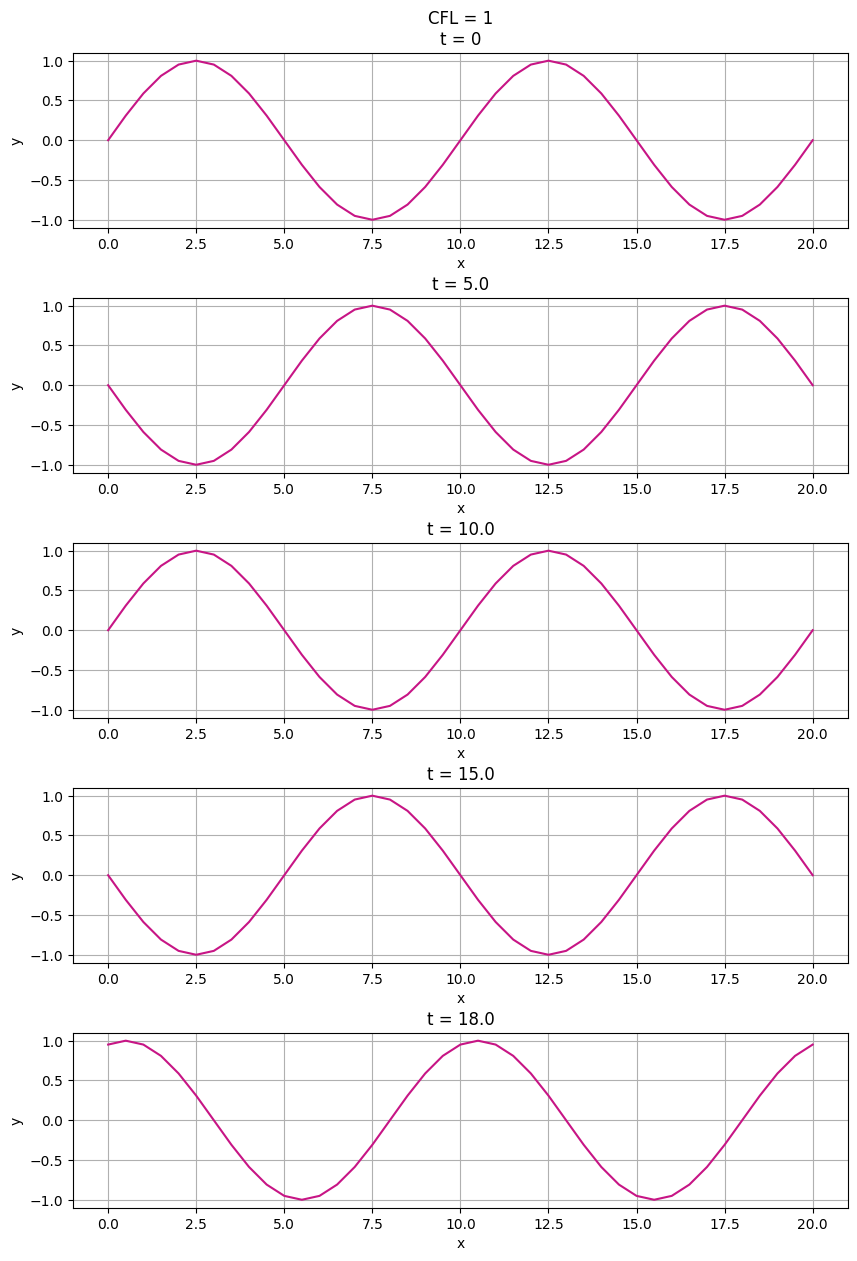

In [9]:
tau = calculate_tau(CFL[1])
x,t = grid(T,L,h,tau)
y1 = corner_scheme(x,t,L)
print_graphs(y1,t,x,CFL[1])

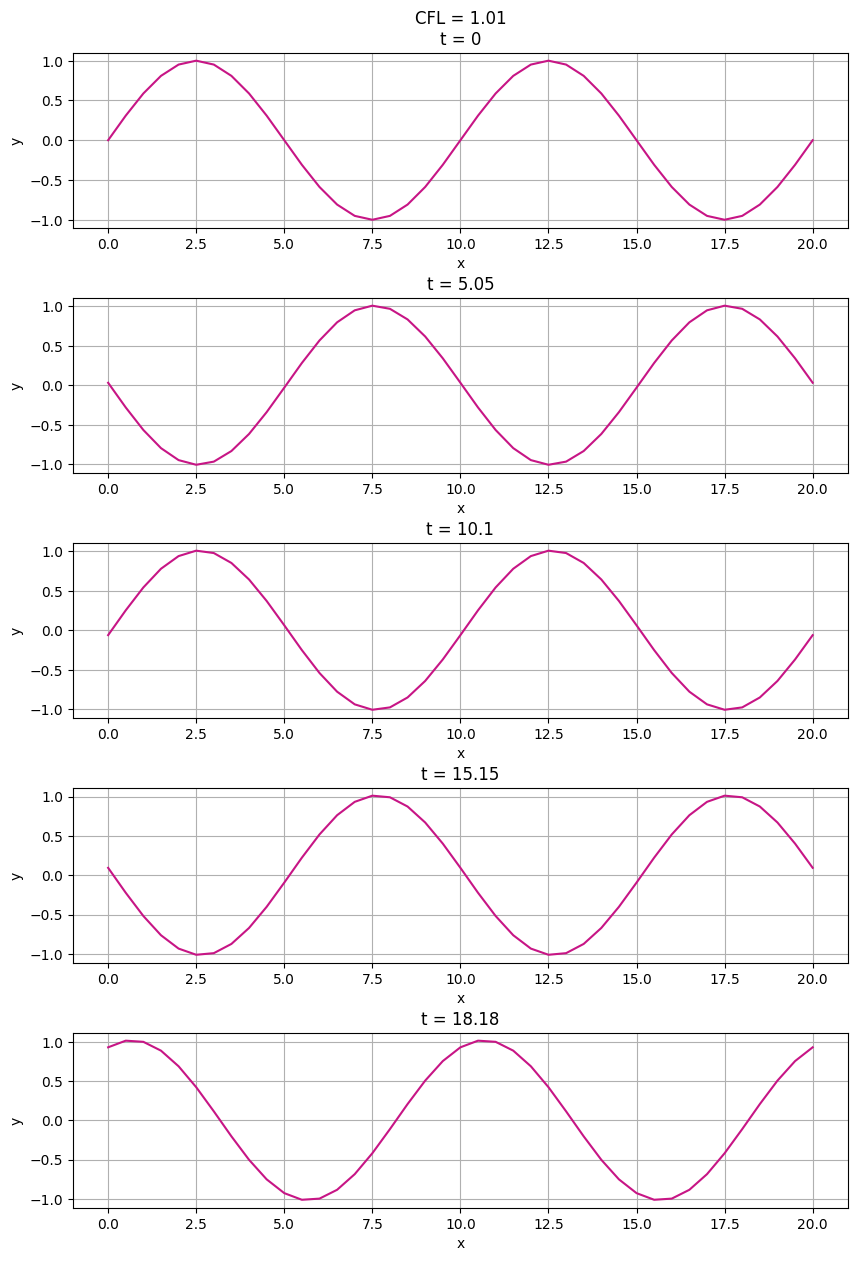

In [10]:
tau = calculate_tau(CFL[2])
x,t = grid(T,L,h,tau)
y1 = corner_scheme(x,t,L)
print_graphs(y1,t,x,CFL[2])

### Схема Лакса-Вендероффа

In [11]:
def Laks_Vanderof(x,t,L):
    f = lambda prev, curr, next, tau , h, a: curr-tau*(a*(next-prev)/(2*h)-(tau*a**2)/2*(next-2*curr+prev)/h**2)
    y = np.zeros([len(x),len(t)]); y0 = []; a = 1
    for i in x:
        y0.append(math.sin(4*math.pi*i/L))
    for i in range(0,len(x)):
            y[i][0] = y0[i]
    for j in range(len(t)-1):
        for i in range(1,len(x)-1):
            y[i][j+1] = f(y[i-1][j],y[i][j],y[i+1][j],tau,h,a)
        y[len(x)-1][j+1] = f(y[len(x)-2][j],y[len(x)-1][j],y[0][j],tau,h,a)
        y[0][j+1] = f(y[len(x)-2][j],y[0][j],y[1][j],tau,h,a)
    return y   

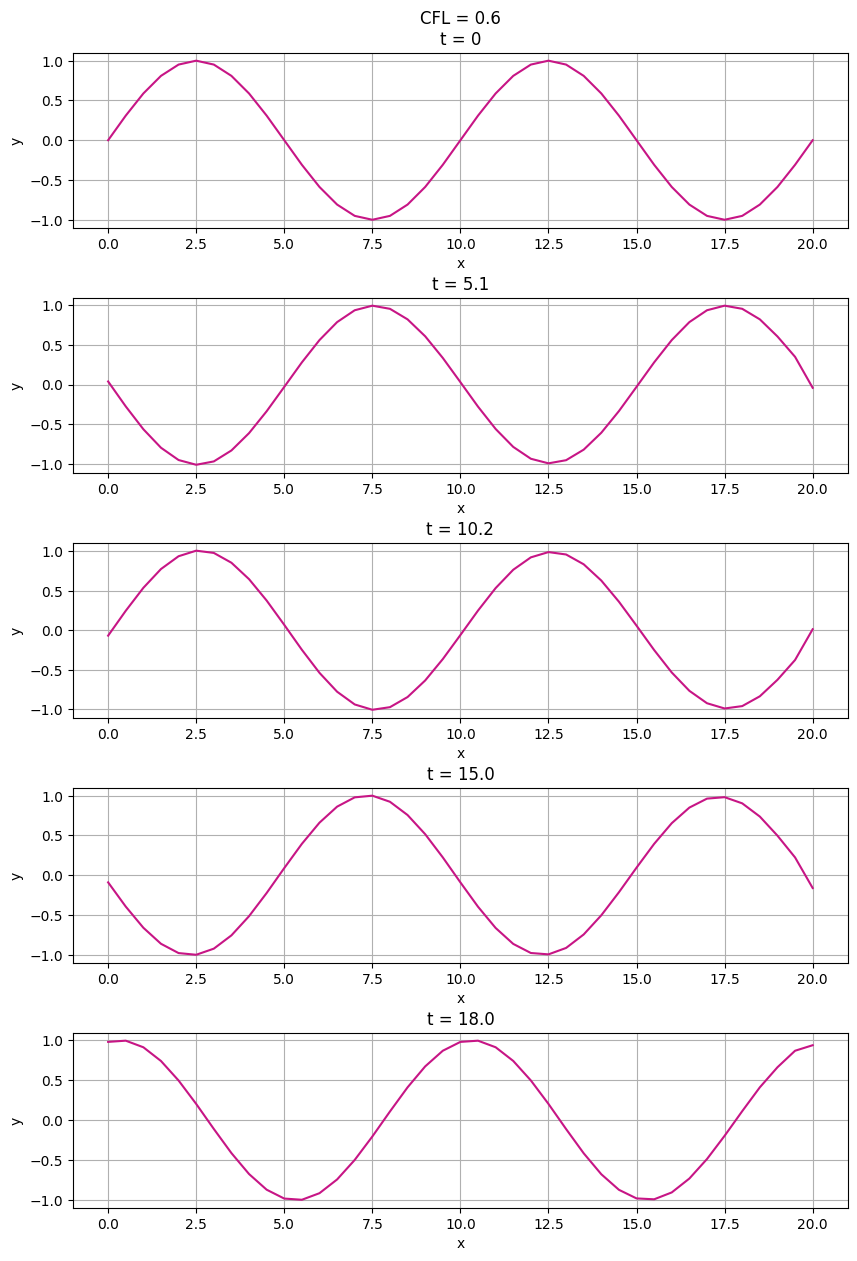

In [12]:
tau = calculate_tau(CFL[0])
x,t = grid(T,L,h,tau)
y1 = Laks_Vanderof(x,t,L)
print_graphs(y1,t,x,CFL[0])

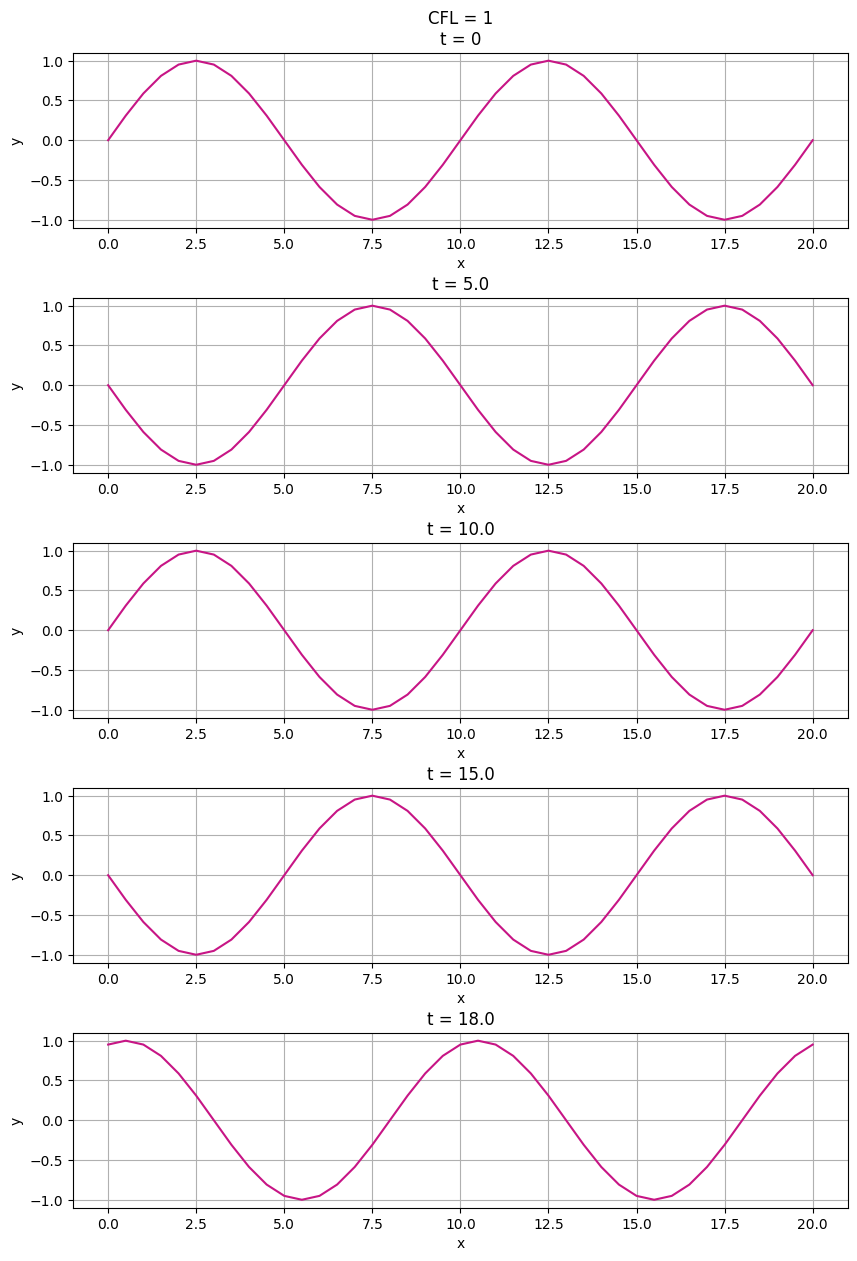

In [13]:
tau = calculate_tau(CFL[1])
x,t = grid(T,L,h,tau)
y1 = Laks_Vanderof(x,t,L)
print_graphs(y1,t,x,CFL[1])

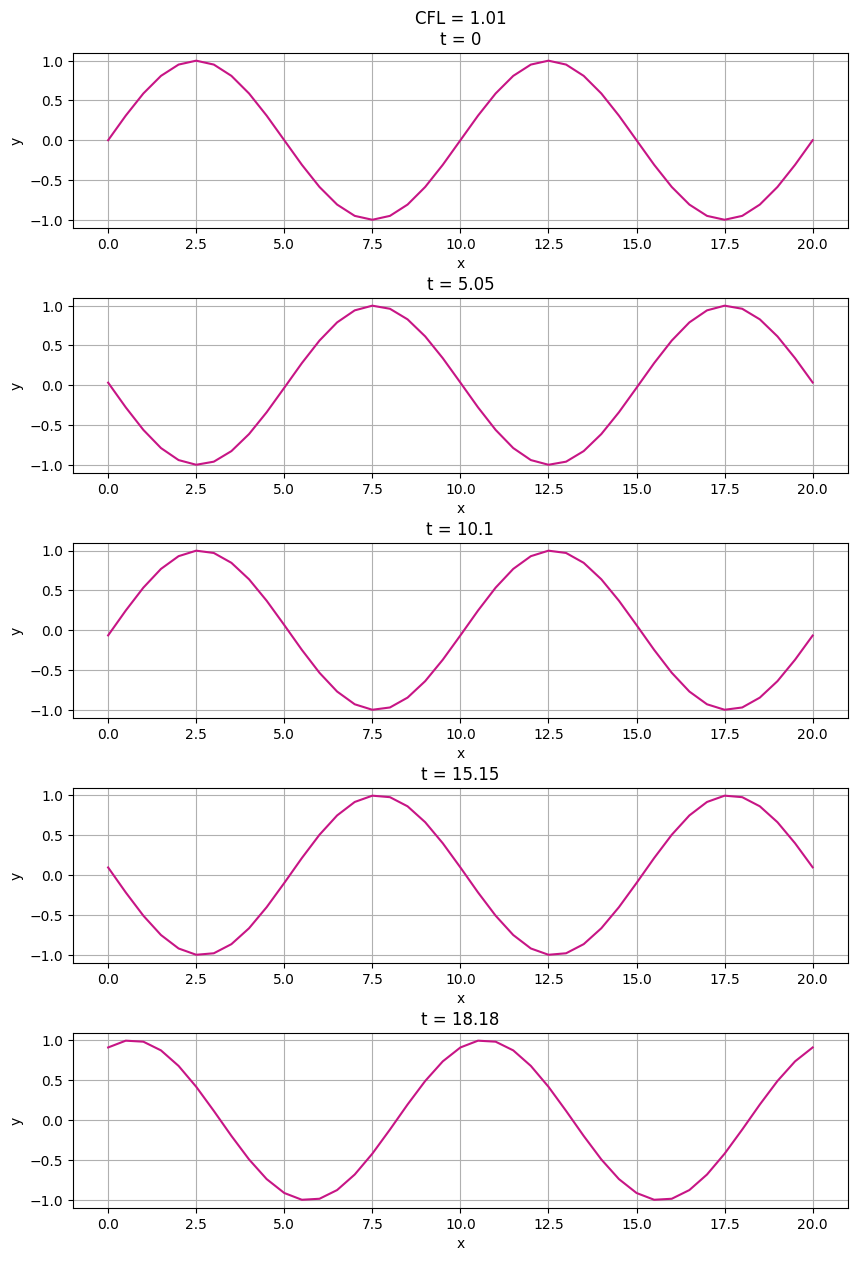

In [14]:
tau = calculate_tau(CFL[2])
x,t = grid(T,L,h,tau)
y1 = Laks_Vanderof(x,t,L)
print_graphs(y1,t,x,CFL[2])

In [16]:
import imageio
from PIL import Image

In [57]:
def animation(y,t,x,CFL,name):
    frames = []
    for time in range(len(t)):
        fig = plt.figure(figsize=(15, 10))
        yn = []
        for i in range(len(x)):
            yn.append(y[i][time])
        plt.plot(x,yn, color = "mediumvioletred")
        title = "CFL = " + str(CFL)
        plt.title(title)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim([0, 20])
        plt.grid()
        fig.set_figheight(5)
        fig.set_figwidth(10)
        plt.ylim([-1,1])
        plt.savefig('task_{}'.format(time))
        plt.close()
    for frame_number in range(0, 40):
        frame = Image.open(f'task_{frame_number}.png')
        frames.append(frame)
    
    frames[0].save(
        'задача{}.gif'.format(str(name)),
        save_all=True,
        append_images=frames[1:],  
        optimize=True,
        duration=100,
        loop=0
    )

In [40]:
tau = calculate_tau(CFL[0])
x,t = grid(T,L,h,tau)
y1 = corner_scheme(x,t,L)
animation(y1,t,x,CFL[0],'_corner_0.6')
tau = calculate_tau(CFL[1])
x,t = grid(T,L,h,tau)
y1 = corner_scheme(x,t,L)
animation(y1,t,x,CFL[1],'_corner_1')
tau = calculate_tau(CFL[2])
x,t = grid(T,L,h,tau)
y1 = corner_scheme(x,t,L)
animation(y1,t,x,CFL[2],'_corner_1.01')

In [41]:
tau = calculate_tau(CFL[0])
x,t = grid(T,L,h,tau)
y1 = Laks_Vanderof(x,t,L)
animation(y1,t,x,CFL[0],'_Laks_Vanderof_0.6')
tau = calculate_tau(CFL[1])
x,t = grid(T,L,h,tau)
y1 = Laks_Vanderof(x,t,L)
animation(y1,t,x,CFL[1],'_Laks_Vanderof_1')
tau = calculate_tau(CFL[1])
x,t = grid(T,L,h,tau)
y1 = Laks_Vanderof(x,t,L)
animation(y1,t,x,CFL[2],'_Laks_Vanderof_1.01')

In [56]:
tau = calculate_tau(1.7)
x,t = grid(T,L,h,tau)
y1 = corner_scheme(x,t,L)
animation(y1,t,x,1.7,'_corner_1.7')

In [61]:
tau = calculate_tau(0.4)
x,t = grid(T,L,h,tau)
y1 = Laks_Vanderof(x,t,L)
animation(y1,t,x,0.4,'_Laks_Vanderof_0.4')